In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpitree.tree import DecisionTreeClassifier, KDTree

In [2]:
np.random.seed(42)

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data[:, :2], iris.target

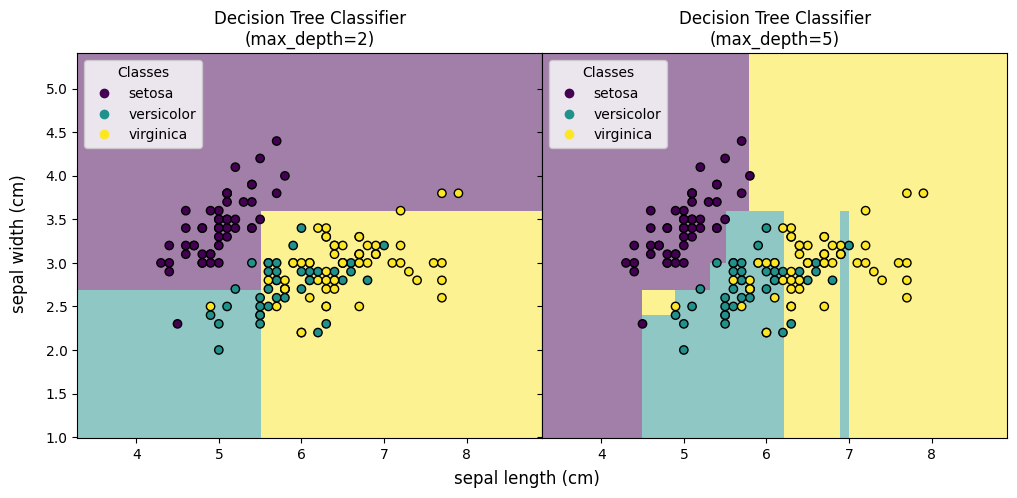

In [4]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, axs = plt.subplots(
    ncols=2,
    sharex="col",
    sharey="row",
    figsize=(12, 5),
    gridspec_kw={"wspace": 0, "hspace": 0},
)

for ax, depth in zip(axs, (2, 5)):
    clf = DecisionTreeClassifier(max_depth=depth).fit(X, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        grid_resolution=200,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="upper left",
        title="Classes",
    )
    _ = disp.ax_.set_title(f"Decision Tree Classifier\n(max_depth={depth})")

fig.supxlabel("sepal length (cm)")
fig.supylabel("sepal width (cm)", x=0.069)

plt.show()

In [5]:
clf = DecisionTreeClassifier(max_depth=2).fit(X, y)
print(clf)

┌── feature_0
│  ├── feature_1 [> 5.5] (None)
│  │  └── class: 0 [> 3.6] (None)
│  │  └── class: 2 [<= 3.6] (None)
│  ├── feature_1 [<= 5.5] (None)
│  │  └── class: 0 [> 2.7] (None)
│  │  └── class: 1 [<= 2.7] (None)


150
Random Points
---
[[6.1 2.8]
 [5.7 3.8]]
Hyperplane: 0.40x + 0.94

50
Random Points
---
[[4.6 3.2]
 [4.9 3.6]]
Hyperplane: -0.75x + 6.96

33
Random Points
---
[[5.1 3.7]
 [5.4 3.9]]
Hyperplane: -1.50x + 11.68

23
Random Points
---
[[5.  3.5]
 [5.1 3.7]]
Hyperplane: -0.50x + 6.12

18
Random Points
---
[[5.2 3.4]
 [5.1 3.5]]
Hyperplane: 1.00x + -1.70

14
Random Points
---
[[5.  3.3]
 [4.8 3.4]]
Hyperplane: 2.00x + -6.45

17
Random Points
---
[[4.4 2.9]
 [4.7 3.2]]
Hyperplane: -1.00x + 7.60

14
Random Points
---
[[4.9 3. ]
 [4.6 3.2]]
Hyperplane: 1.50x + -4.03

100
Random Points
---
[[6.  2.2]
 [6.1 2.9]]
Hyperplane: -0.14x + 3.41

81
Random Points
---
[[6.1 3. ]
 [5.8 2.7]]
Hyperplane: -1.00x + 8.80

61
Random Points
---
[[7.7 2.6]
 [6.4 3.1]]
Hyperplane: 2.60x + -15.48

51
Random Points
---
[[6.8 3.2]
 [6.3 3.4]]
Hyperplane: 2.50x + -13.08

23
Random Points
---
[[6.  2.9]
 [6.3 3.3]]
Hyperplane: -0.75x + 7.71

15
Random Points
---
[[6.1 3. ]
 [5.9 3. ]]
Hyperplane: x=6.0

15
Random 

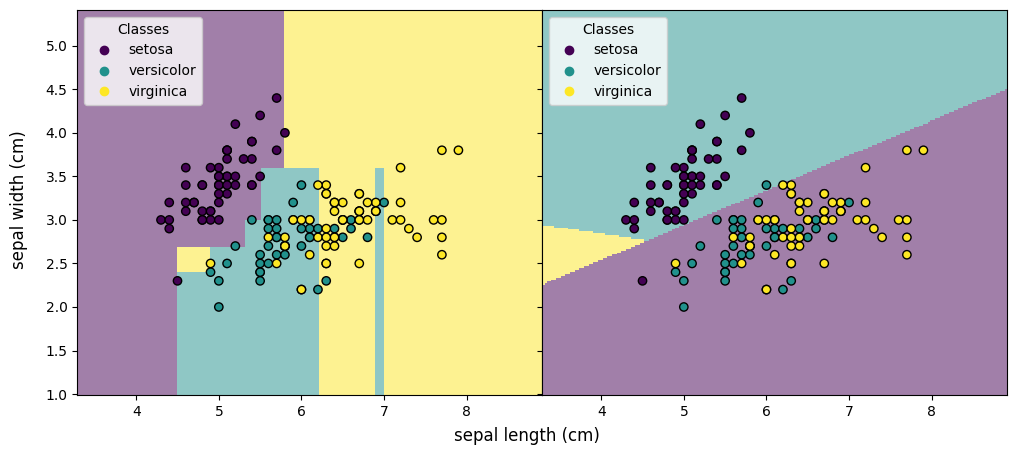

In [8]:
fig, axs = plt.subplots(
    ncols=2,
    sharex="col",
    sharey="row",
    figsize=(12, 5),
    gridspec_kw={"wspace": 0, "hspace": 0},
)

clfs = [DecisionTreeClassifier(max_depth=5).fit(X, y), KDTree().fit(X, y)]

for clf, ax, depth in zip(clfs, axs, (2, 5)):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        grid_resolution=200,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="upper left",
        title="Classes",
    )

fig.supxlabel("sepal length (cm)")
fig.supylabel("sepal width (cm)", x=0.069)

plt.show()

In [9]:
# from itertools import product

# n_classes = np.unique(y)
# colors = "w", "whitesmoke", "darkgray"
# markers = list("s^o")

# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# n_rows, n_cols = 2, 2
# fig, axs = plt.subplots(
#     n_rows,
#     n_cols,
#     sharex="col",
#     sharey="row",
#     figsize=(10, 7.5),
#     gridspec_kw={"wspace": 0, "hspace": 0},
# )

# for (i, j), clf in zip(product(*map(range, [n_rows, n_cols])), estimators):
#     z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#     axs[i, j].contourf(xx, yy, z, alpha=0.4)

#     for t, c, marker in zip(n_classes, colors, markers):
#         axs[i, j].scatter(
#             X[y == t, 0],
#             X[y == t, 1],
#             c=c,
#             s=30,
#             linewidth=1.2,
#             marker=marker,
#             label=t,
#         )

# axs[0, 0].legend(title="Class", loc="upper left", shadow=True)

# fig.suptitle("Decision Tree Classifiers varying $max\_depth$ values")
# fig.supxlabel("sepal length (cm)")
# fig.supylabel("sepal width (cm)")

# plt.show()

In [10]:
# n_classes = np.unique(y)
# colors = "w", "darkgray"
# markers = list("s^")

# plt.figure()

# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
# plt.contourf(xx, yy, Z, alpha=0.4, cmap="Greys")

# for t, c, marker in zip(n_classes, colors, markers):
#     plt.scatter(
#         X[y == t, 0],
#         X[y == t, 1],
#         c=c,
#         s=30,
#         linewidth=1.2,
#         marker=marker,
#         label=t,
#     )

# plt.legend(title="Class", loc="upper left", shadow=True)
# plt.show()